### Task 6.0

In [1]:
from tensorflow.keras.datasets import fashion_mnist as fashion_mnist
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input

import numpy as np
from matplotlib import pyplot

In [2]:
def load_data():
    
    '''
    mnist fashion is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. 
    The mapping of all 0-9 integers to class labels is listed below.
    0: T-shirt/top
    1: Trouser
    2: Pullover
    3: Dressinput_shape = x_train.shape[1:]
    4: Coat
    5: Sandal
    6: Shirt
    7: Sneaker
    8: Bag
    9: Ankle boot
    '''
    (train_X, train_y_1), (test_X, test_y_1) = fashion_mnist.load_data()
    n_class_1 = 10
    
    '''
    map to 3 new label where:-
    label 0 = 5 (Sandal), 7 (Sneaker) and 9 (Ankle Boot)
    label 1 = 3 (Shirt), 6 (Shirt) and 8 (Bag) maps to 1
    label 2 = 0 (T-Shirt/top), 1 (Trouser), 4 (Coat)
    '''
    n_class_2 = 3
    train_y_2 = list(0 if y in [5,7,9] else 1 if y in [3,6,8] else 2 for y in train_y_1)
    test_y_2 = list(0 if y in [5,7,9] else 1 if y in [3,6,8] else 2 for y in test_y_1)
    
    # convert the shape from (28, 28) to (28, 28, 1)
    train_X = np.expand_dims(train_X, axis=3)
    test_X = np.expand_dims(test_X, axis=3)
    
    # convert to one hot encoding based on n_class_1 = 10
    train_y_1  = to_categorical(train_y_1, n_class_1)
    test_y_1 = to_categorical(test_y_1, n_class_1)

    # convert to one hot encoding based on n_class_2 = 3
    train_y_2  = to_categorical(train_y_2, n_class_2)
    test_y_2 = to_categorical(test_y_2, n_class_2)
    
    # return the pre-processed data
    return train_X, train_y_1, train_y_2, test_X, test_y_1, test_y_2 
        

In [3]:
x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data()

Let's visualize samples of the data:-

In [4]:
# summarize the preprocessed dataset
print('Train: X=%s, y_train_1=%s, y_train_1=%s' % (x_train.shape, y_train_1.shape, y_train_2.shape))
print('Test: X=%s, y_test_1=%s, y_test_2=%s' % (x_test.shape, y_test_1.shape, y_test_2.shape))

Train: X=(60000, 28, 28, 1), y_train_1=(60000, 10), y_train_1=(60000, 3)
Test: X=(10000, 28, 28, 1), y_test_1=(10000, 10), y_test_2=(10000, 3)


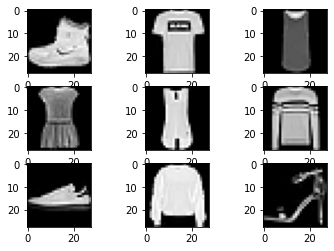

In [5]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'), label="%d"%i)
# show the figure
pyplot.show()

Label 1 = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Label 2 = [0. 0. 1.] 


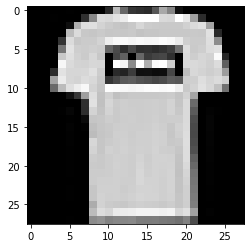

In [6]:
data_index = 1
# Label 1 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] because 9 (Ankle Boot) 
# Label 2 = [0. 0. 1.]  because label 2 includes 0 (T-Shirt/top), 1 (Trouser), 4 (Coat)
pyplot.imshow(x_train[data_index], cmap=pyplot.get_cmap('gray'), label="%d"%i)
print('Label 1 = %s, Label 2 = %s ' % (y_train_1[data_index],y_train_2[data_index]))

## Task 6.1

In this question you will construct two separate CNN classifiers of identical structure (except their output dimensions) one for each of the two tasks. In other words, create a network for item classification and a network for item group classification.

The CNNs: For the sake of convenience, we will use the same CNN filters as Question 4 [32,64,128]. However, our kernel size will be 3 × 3 and a stride of 1 for all convolutional layers. Maxpooling layers will also need to be implemented after the first and second convolutional layers. These maxpooling layers have a kernel size of two and a stride of 2.

After the final convolution, flatten the outputs and pass them to dense layers [3136,1024,100, N] where N is the number of outputs required (10 for task1 or 3 for task2).

### Task 1 - Model for item classification

In [8]:
def create_model(name,input_shape,output_neurons,conv_kernel_size,conv_strides,pool_size,pooling_strides):
    model = Sequential(name=name)
    
    '''
    conv_kernel_size=(3,3)
    conv_strides=1 
    pool_size=2 
    pooling_strides=2
    '''
    # Adding Convolutional and MaxPooling layers
    model.add(Conv2D(32,conv_kernel_size, strides=conv_strides,  activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=pool_size, strides=pooling_strides))
    
    model.add(Conv2D(64,conv_kernel_size, strides=conv_strides, activation='relu', padding='same', ))
    model.add(MaxPooling2D(pool_size=pool_size, strides=pooling_strides))
    
    model.add(Conv2D(128,conv_kernel_size, strides=conv_strides, activation='relu', padding='same', ))
    
    model.add(Flatten())
    
    model.add(Dense(3136))
    model.add(Dense(1024))
    model.add(Dense(100))
    model.add(Dense(output_neurons, activation='softmax'))
    
    return model


In [9]:
model_name="item"
conv_kernel_size=(3,3)
conv_strides=1 
pool_size=2 
pooling_strides=2
input_shape = x_train.shape[1:]
output_neurons=10
task_6_1_model_1 = create_model(model_name,input_shape,output_neurons,conv_kernel_size,conv_strides,pool_size,pooling_strides)
task_6_1_model_1.summary()

Model: "item"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 3136)              1967212

In [10]:
# Optimizing and fitting model
opt = optimizers.Adam(learning_rate=0.001)
task_6_1_model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = task_6_1_model_1.fit(x_train, y_train_1, batch_size=10, epochs=5)

Epoch 1/5
6000/6000 [==============================] - 739s 123ms/step - loss: 1.3276 - accuracy: 0.7258
Epoch 2/5
6000/6000 [==============================] - 743s 124ms/step - loss: 0.5993 - accuracy: 0.7945
Epoch 3/5
2909/6000 [=============>................] - ETA: 6:20 - loss: 0.5482 - accuracy: 0.8089

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6000/6000 [==============================] - 734s 122ms/step - loss: 0.4976 - accuracy: 0.8230
Epoch 4/5
6000/6000 [==============================] - 736s 123ms/step - loss: 0.4384 - accuracy: 0.8419
Epoch 5/5
 331/6000 [>.............................] - ETA: 11:26 - loss: 0.4816 - accuracy: 0.8329

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6000/6000 [==============================] - 739s 123ms/step - loss: 0.4205 - accuracy: 0.8481


In [21]:
_,acc = task_6_1_model_1.evaluate(x_test, y_test_1, verbose=1)

313/313 [==============================] - 7s 23ms/step - loss: 0.4469 - accuracy: 0.8405


In [27]:
opt = optimizers.Adam(learning_rate=0.001)
task_6_1_model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = task_6_1_model_1.fit(x_train, y_train_1, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 135s 223ms/step - loss: 4.5523 - accuracy: 0.7205
Epoch 2/30
600/600 [==============================] - 134s 223ms/step - loss: 0.5354 - accuracy: 0.8082
Epoch 3/30
600/600 [==============================] - 133s 222ms/step - loss: 0.4592 - accuracy: 0.8353
Epoch 4/30
600/600 [==============================] - 133s 222ms/step - loss: 0.4144 - accuracy: 0.8510
Epoch 5/30
600/600 [==============================] - 133s 221ms/step - loss: 0.3813 - accuracy: 0.8611
Epoch 6/30
600/600 [==============================] - 133s 221ms/step - loss: 0.3593 - accuracy: 0.8688
Epoch 7/30
600/600 [==============================] - 134s 223ms/step - loss: 0.3343 - accuracy: 0.8781
Epoch 8/30
600/600 [==============================] - 132s 220ms/step - loss: 0.3218 - accuracy: 0.8819
Epoch 9/30
600/600 [==============================] - 132s 221ms/step - loss: 0.3041 - accuracy: 0.8887
Epoch 10/30
600/600 [==============================] - 133s 221m

In [29]:
_,acc = task_6_1_model_1.evaluate(x_test, y_test_1, verbose=1)

313/313 [==============================] - 7s 22ms/step - loss: 0.3953 - accuracy: 0.8919


### Task 2 - Model for item group classification

In [21]:
model_name="item_group"
conv_kernel_size=(3,3)
conv_strides=1 
pool_size=2 
pooling_strides=2
input_shape = x_train.shape[1:]
output_neurons=3
task_6_1_model_2 = create_model(model_name,input_shape,output_neurons,conv_kernel_size,conv_strides,pool_size,pooling_strides)
task_6_1_model_2.summary()

Model: "item_group"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 3136)              1

In [22]:
opt = optimizers.Adam(learning_rate=0.001)
task_6_1_model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_2 = task_6_1_model_2.fit(x_train, y_train_2, batch_size=10, epochs=5)

Epoch 1/5
6000/6000 [==============================] - 746s 124ms/step - loss: 1.1338 - accuracy: 0.8416
Epoch 2/5
6000/6000 [==============================] - 745s 124ms/step - loss: 0.4752 - accuracy: 0.8200
Epoch 3/5
6000/6000 [==============================] - 744s 124ms/step - loss: 0.3203 - accuracy: 0.8602
Epoch 4/5
6000/6000 [==============================] - 745s 124ms/step - loss: 0.3254 - accuracy: 0.8582
Epoch 5/5
6000/6000 [==============================] - 764s 127ms/step - loss: 0.2607 - accuracy: 0.8841


In [23]:
_,task_6_1_model_2_acc = task_6_1_model_2.evaluate(x_test,y_test_2)

313/313 [==============================] - 7s 23ms/step - loss: 0.2859 - accuracy: 0.8766


In [30]:
opt = optimizers.Adam(learning_rate=0.001)
task_6_1_model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_2 = task_6_1_model_2.fit(x_train, y_train_2, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 132s 220ms/step - loss: 0.2143 - accuracy: 0.9046
Epoch 2/30
600/600 [==============================] - 131s 219ms/step - loss: 0.1993 - accuracy: 0.9112
Epoch 3/30
600/600 [==============================] - 131s 218ms/step - loss: 0.1917 - accuracy: 0.9144
Epoch 4/30
600/600 [==============================] - 132s 220ms/step - loss: 0.1835 - accuracy: 0.9179
Epoch 5/30
600/600 [==============================] - 131s 219ms/step - loss: 0.1794 - accuracy: 0.9203
Epoch 6/30
600/600 [==============================] - 132s 219ms/step - loss: 0.1707 - accuracy: 0.9235
Epoch 7/30
600/600 [==============================] - 130s 217ms/step - loss: 0.1634 - accuracy: 0.9276
Epoch 8/30
600/600 [==============================] - 131s 218ms/step - loss: 0.1657 - accuracy: 0.9278
Epoch 9/30
600/600 [==============================] - 131s 218ms/step - loss: 0.1548 - accuracy: 0.9322
Epoch 10/30
600/600 [==============================] - 131s 219m

In [32]:
_,task_6_1_model_2_acc = task_6_1_model_2.evaluate(x_test,y_test_2)

313/313 [==============================] - 7s 22ms/step - loss: 0.2773 - accuracy: 0.9130


## Task 6.2

Building a MTL Network In this question, you will build one MTL model for the two MNIST fashion tasks

In [7]:
# build the body

#input_shape = (*x_train.shape[1:], 1)
input_shape = x_train.shape[1:]

# build the shared backbone
shared_backbone = Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    Flatten(),
    Dense(3136)
])

'''
Next we build our network. 
Shared is a simple convolutional network that represents the body of the network. 
It extracts features for the two "heads": out_class and out_flip.
'''
inputs = Input(shape=input_shape)
shared_backbone_output = shared_backbone(inputs)

# Setting the name of each head with separate output layers 
item_class_head = Sequential(name='item_head')
item_class_head.add(Dense(1024))
item_class_head.add(Dense(100))
item_class_head.add(Dense(10, activation='softmax'))

group_class_head = Sequential(name='item_group_head')
group_class_head.add(Dense(1024))
group_class_head.add(Dense(100))
group_class_head.add(Dense(3, activation='softmax'))


out_item_class = item_class_head(shared_backbone_output)
out_group_class = group_class_head(shared_backbone_output)

model = Model(inputs=inputs, outputs={
    'out_item_class': out_item_class,
    'out_group_class': out_group_class
})


In [8]:
from tensorflow.keras import backend as K

# Calculating crossentropy
def masked_categorical_crossentropy(y_true, y_pred):
    mask = K.max(y_true, axis=-1)
    loss = K.categorical_crossentropy(y_true, y_pred) * mask
    return K.sum(loss) / K.sum(mask)


def run_model(learning_rate,batch_size,epochs,loss_weight_lamba):
    history_list = []

    for i_loss_weight_lamba in loss_weight_lamba:
        # https://stackoverflow.com/questions/49404309/how-does-keras-handle-multiple-losses
        # [item_loss, item_group_loss]
        #loss_weights=[i_loss_weight_lamba,1-i_loss_weight_lamba]
        #opt = optimizers.Adam(learning_rate=learning_rate)

        # Compiling the model calculate the accuracy for each head
        model.compile(
            loss={
                'out_item_class': masked_categorical_crossentropy,
                'out_group_class': masked_categorical_crossentropy
            },
            optimizer=optimizers.Adam(learning_rate=learning_rate),
            metrics=['accuracy'],
            loss_weights={"out_item_class": i_loss_weight_lamba, "out_group_class": 1-i_loss_weight_lamba}
        )

        print()
        print("i_loss_weight_lamba = ",i_loss_weight_lamba)

        hist_train = model.fit(
        x_train[...,np.newaxis], {
            'out_item_class': y_train_1, 
            'out_group_class': y_train_2
        },  
        batch_size=batch_size,
        epochs=epochs
        )
        
        # retrieving losses and accuracies per head 
        loss, item_group_head_loss, item_head_loss, item_group_head_accuracy, item_head_accuracy = model.evaluate( x_test[...,np.newaxis], {'out_item_class': y_test_1,'out_group_class': y_test_2})
        eval_hist = {'i_loss_weight_lamba':i_loss_weight_lamba,'item_group_head_accuracy':item_group_head_accuracy,'item_head_accuracy':item_head_accuracy}

        history_list += [eval_hist]

    return history_list

In [9]:
loss_weight_lamba=[0.0,0.3,0.5,0.8,1.0]
history_list = run_model(learning_rate=0.001,batch_size=10,epochs=5,loss_weight_lamba=loss_weight_lamba)


i_loss_weight_lamba =  0.0
Epoch 1/5
6000/6000 [==============================] - 841s 140ms/step - loss: 1.3053 - item_group_head_loss: 1.3053 - item_head_loss: 2.8438 - item_group_head_accuracy: 0.8283 - item_head_accuracy: 0.0511
Epoch 2/5
6000/6000 [==============================] - 839s 140ms/step - loss: 0.3821 - item_group_head_loss: 0.3821 - item_head_loss: 2.5853 - item_group_head_accuracy: 0.8498 - item_head_accuracy: 0.0828
Epoch 3/5
6000/6000 [==============================] - 830s 138ms/step - loss: 0.2859 - item_group_head_loss: 0.2859 - item_head_loss: 2.6098 - item_group_head_accuracy: 0.8755 - item_head_accuracy: 0.1166
Epoch 4/5
6000/6000 [==============================] - 826s 138ms/step - loss: 0.2508 - item_group_head_loss: 0.2508 - item_head_loss: 2.5563 - item_group_head_accuracy: 0.8938 - item_head_accuracy: 0.1235
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 0.2239 - item_group_head_loss: 0.2239 - item_head_loss: 2.6972 - item_grou

In [10]:
item_group_head_accuracy = []
item_head_accuracy = []
for i in history_list:
    
    item_group_head_accuracy += [i.get('item_group_head_accuracy')]
    item_head_accuracy += [i.get('item_head_accuracy')]

print('History list :')
print(history_list)
print()
print('item_group_head_accuracy:')
print(item_group_head_accuracy)
print()
print('item_head_accuracy:')
print(item_head_accuracy)

History list :
[{'i_loss_weight_lamba': 0.0, 'item_group_head_accuracy': 0.9031000137329102, 'item_head_accuracy': 0.03200000151991844}, {'i_loss_weight_lamba': 0.3, 'item_group_head_accuracy': 0.9125999808311462, 'item_head_accuracy': 0.8398000001907349}, {'i_loss_weight_lamba': 0.5, 'item_group_head_accuracy': 0.9096999764442444, 'item_head_accuracy': 0.8485000133514404}, {'i_loss_weight_lamba': 0.9, 'item_group_head_accuracy': 0.9041000008583069, 'item_head_accuracy': 0.8396000266075134}, {'i_loss_weight_lamba': 1.0, 'item_group_head_accuracy': 0.9010000228881836, 'item_head_accuracy': 0.8580999970436096}]

item_group_head_accuracy:
[0.9031000137329102, 0.9125999808311462, 0.9096999764442444, 0.9041000008583069, 0.9010000228881836]

item_head_accuracy:
[0.03200000151991844, 0.8398000001907349, 0.8485000133514404, 0.8396000266075134, 0.8580999970436096]


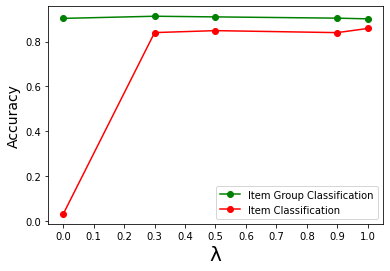

In [11]:
import matplotlib.pyplot as plt
plt.plot(loss_weight_lamba,item_group_head_accuracy, c='g', marker='o')
plt.plot(loss_weight_lamba,item_head_accuracy, c='r', marker='o')

# Plotting item group accuracy vs item accuracy in red
plt.legend(['Item Group Classification', 'Item Classification'])
plt.xlabel("λ", **{'size':'20'})
plt.ylabel("Accuracy", **{'size':'14'})
plt.xticks(np.arange(min(loss_weight_lamba), max(loss_weight_lamba)+0.1, 0.1))
plt.show()

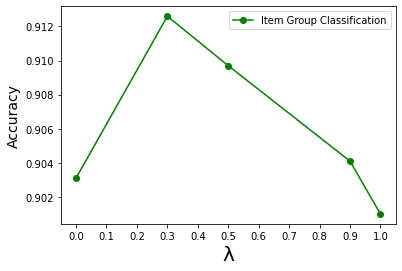

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_weight_lamba,item_group_head_accuracy, c='g', marker='o')
#plt.plot(loss_weight_lamba,item_head_accuracy, c='r', marker='o')

# Plotting Item Group Classification
plt.legend(['Item Group Classification'])
plt.xlabel("λ", **{'size':'20'})
plt.ylabel("Accuracy", **{'size':'14'})
plt.xticks(np.arange(min(loss_weight_lamba), max(loss_weight_lamba)+0.1, 0.1))
plt.show()

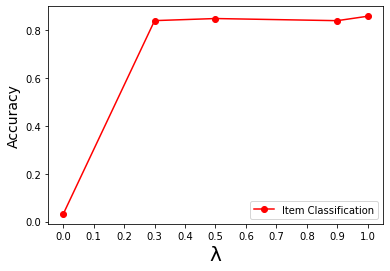

In [17]:
import matplotlib.pyplot as plt

plt.plot(loss_weight_lamba,item_head_accuracy, c='r', marker='o')

# Plotting Item Classification
plt.legend(['Item Classification'])
plt.xlabel("λ", **{'size':'20'})
plt.ylabel("Accuracy", **{'size':'14'})
plt.xticks(np.arange(min(loss_weight_lamba), max(loss_weight_lamba)+0.1, 0.1))
plt.show()

In [12]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
labels = ['shoes','gendered','unisex']

# Prediction outputs
predicted = model.predict(x_test[:5])
y1p,y2p = (predicted[output] for output in ('out_item_class', 'out_group_class'))
for x, y1, y2 in zip(x_test[:8], y1p, y2p):
    print('class:', classes[np.argmax(y1)])
    for label, value in zip(labels, y2):
        desc = 'no' if value < 0.5 else 'yes'
        print(f'{label}: {desc}')
    print()

class: Ankle boot
shoes: yes
gendered: no
unisex: no

class: Pullover
shoes: no
gendered: no
unisex: yes

class: Trouser
shoes: no
gendered: no
unisex: yes

class: Trouser
shoes: no
gendered: no
unisex: yes

class: Pullover
shoes: no
gendered: no
unisex: yes

